In [5]:
import pandas as pd
import pickle 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
with open('results/learn_curve_xp_type_tau_uniform.pkl', 'rb') as f:
    res_uniform_tau = pickle.load(f)

with open('results/learn_curve_xp_type_tau_constant.pkl', 'rb') as f:
    res_constant_tau = pickle.load(f)

with open('results/learn_curve_xp_type_tau_gauss.pkl', 'rb') as f:
    res_gauss_tau = pickle.load(f)

#### Figure 1: Loss function per epoch and training and validation sets

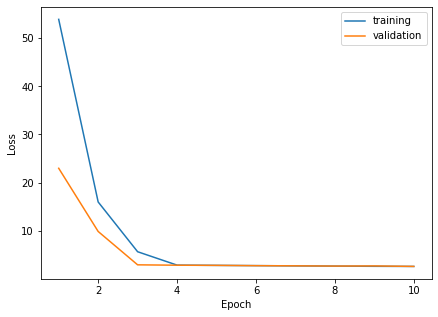

In [7]:
# uniform tau xp
loss_train = np.array(res_constant_tau[0]['loss_supervised_train']) + np.array(res_constant_tau[0]['loss_reg_train'])
loss_valid = np.array(res_constant_tau[0]['loss_supervised_valid']) + np.array(res_constant_tau[0]['loss_reg_valid'])
plt.figure(figsize=(7, 5))
plt.plot(np.arange(1, len(loss_train)+1), loss_train, label='training')
plt.plot(np.arange(1, len(loss_valid)+1), loss_valid, label='validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### Figure 2: Accuracy of model with time constants generated from a random uniform distribution with increasing bounds

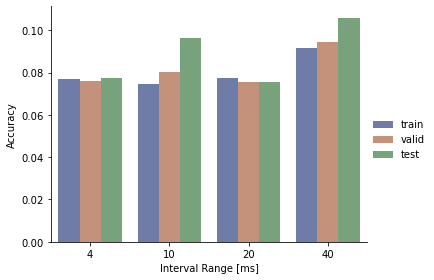

In [130]:
df = pd.DataFrame()
df['test'] = [x['acc_test'] for x in res_uniform_tau]
df['train'] = [x['acc_train'][-1] for x in res_uniform_tau]
df['valid'] = [x['acc_valid'][-1] for x in res_uniform_tau]
df['lower'] = [x['xp_params']['uniform_lower_bounds'][x['i']] for x in res_uniform_tau]
df['upper'] = [x['xp_params']['uniform_upper_bounds'][x['i']] for x in res_uniform_tau]
df['width'] = (round((df['upper'] - df['lower']) * 1e3)).astype(int)
df = df.melt(id_vars=['width'], value_vars=['train', 'valid', 'test'], value_name='acc')

g = sns.catplot(
    data=df, kind="bar",
    x="width", y="acc", hue='variable',
    ci="sd", palette="dark", alpha=.6, height=4, aspect=4/3
)
g.legend.set_title('')
g.set_axis_labels("Interval Range [ms]", "Accuracy")
plt.show()

#### Figure 3: Accuracy of model with time constants generated from a normal distribution with increasing variance

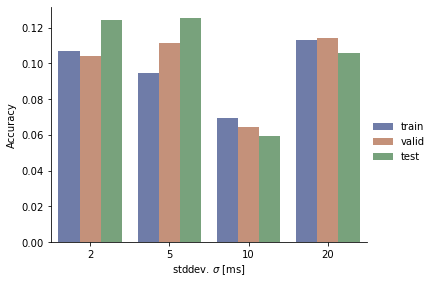

In [128]:
df = pd.DataFrame()
df['test'] = [x['acc_test'] for x in res_gauss_tau]
df['train'] = [x['acc_train'][-1] for x in res_gauss_tau]
df['valid'] = [x['acc_valid'][-1] for x in res_gauss_tau]
df['stddev'] = [x['xp_params']['gauss_std'][x['i']] for x in res_gauss_tau]
df['stddev'] = round(df['stddev'] * 1e3).astype(int)
df = df.melt(id_vars=['stddev'], value_vars=['train', 'valid', 'test'], value_name='acc')

g = sns.catplot(
    data=df, kind="bar",
    x="stddev", y="acc", hue='variable',
    ci="sd", palette="dark", alpha=.6, height=4, aspect=4/3
)
g.legend.set_title('')
g.set_axis_labels("stddev. $\sigma$ [ms]", "Accuracy")
plt.show()

#### Figure 4: Accuracy of model with increasing homogenous time constants

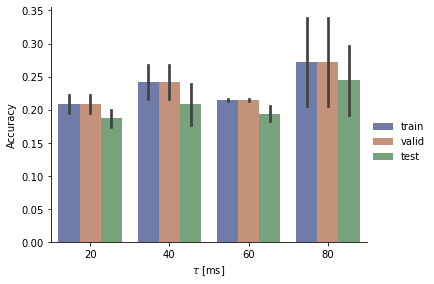

In [8]:
df = pd.DataFrame()
df['test'] = [x['acc_test'] for x in res_constant_tau]
df['train'] = [x['acc_train'][-1] for x in res_constant_tau]
df['valid'] = [x['acc_valid'][-1] for x in res_constant_tau]
df['tau'] = [x['xp_params']['constant_tau'][x['i']] for x in res_constant_tau]
df['tau'] = round(df['tau'] * 1e3).astype(int)
df = df.melt(id_vars=['tau'], value_vars=['train', 'valid', 'test'], value_name='acc')

g = sns.catplot(
    data=df, kind="bar",
    x="tau", y="acc", hue='variable',
    ci="sd", palette="dark", alpha=.6,height=4, aspect=4/3
)
g.legend.set_title('')
g.set_axis_labels("$\\tau$ [ms]", "Accuracy")
plt.show()

### Checks

#### Random uniform distribution of time constants

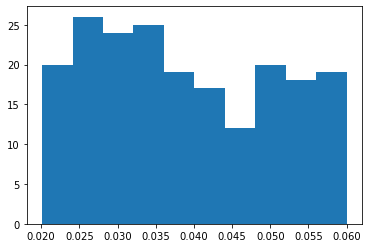

In [124]:
plt.figure()
plt.hist(res_uniform_tau[3]['gen_distribution_tau'][0])
plt.show()

#### Random gaussian distribution of time constants

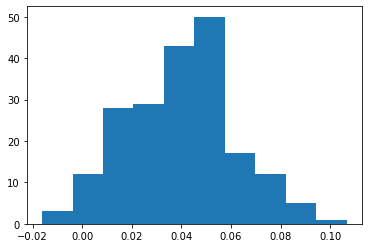

In [123]:
plt.figure()
plt.hist(res_gauss_tau[3]['gen_distribution_tau'][0])
plt.show()

#### Constant distribution of time constants

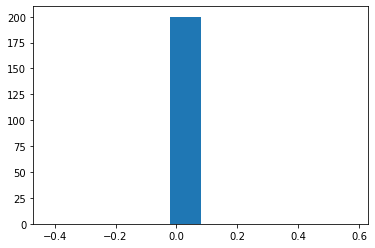

In [125]:
plt.figure()
plt.hist(res_constant_tau[3]['gen_distribution_tau'][0])
plt.show()